# Transfer larning with tensorflow with tensorflow part two - fine tuning
In prevision notebook we covered transfer learning feature extraction, 
* now its time to learn about a new kind of transfer learning: Fine-Tunning 

In [ ]:
!nvidia-smi

Thu Jul  1 08:52:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#creating helper function
! wget = https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-03 06:35:12--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-07-03 06:35:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-03 06:35:12 (79.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]

FINISHED --2021-07-03 06:35:12--
Total wall clock time: 0.08s
Downloaded: 1 files, 10K in 0s (79.2 MB/s)


In [ ]:
# Import helper function we're going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

# lets gets some data

This time we're going to see how we can use the pretrained models within tf.keras.applications and apply them to our own problems (recognition image of food).  

In [ ]:
# get data (10% of 10 food classes from food101)

import zipfile

#download images
!wget = https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-07-03 06:35:29--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-07-03 06:35:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   218MB/s    in 0.7s    

2021-07-03 06:35:29 (218 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

FINISHED --2021-07-03 06:35:29--
Total wall clock time: 0.9s
Downloaded: 1 files, 161M in 0.7s (218 MB/s)


In [ ]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [ ]:
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_per

In [ ]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf
image_size = (224,224) 
batch_size = 32
train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = image_size,
                                                                    label_mode='categorical',
                                                                    batch_size = batch_size,
                                                                    )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                    image_size = image_size,
                                                                    label_mode='categorical',
                                                                    batch_size = batch_size,
                                                                    )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
train_data_10.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# see a example of a batch of data
for image, label in train_data_10.take(1):
  print(image, label)

tf.Tensor(
[[[[254.35715    246.35715    200.73979   ]
   [252.07143    245.92857    198.07143   ]
   [250.27551    244.91837    192.55103   ]
   ...
   [250.63776    244.63776    229.35205   ]
   [251.40308    245.40308    232.11736   ]
   [252.35715    246.35715    234.35715   ]]

  [[252.73979    244.73979    198.73979   ]
   [249.41837    243.27551    195.41837   ]
   [244.71428    239.35713    189.11224   ]
   ...
   [247.14285    240.14285    221.21428   ]
   [249.2143     242.2143     224.35715   ]
   [251.09694    244.02551    226.38266   ]]

  [[250.21939    242.21939    196.21939   ]
   [245.98468    238.91325    192.91325   ]
   [247.64285    241.2857     195.07143   ]
   ...
   [246.78574    239.78574    213.35716   ]
   [247.85716    240.07144    216.42859   ]
   [249.06636    241.06636    219.63779   ]]

  ...

  [[246.         219.21426    101.785736  ]
   [246.19896    219.41322    101.984695  ]
   [247.04591    220.26018    102.83165   ]
   ...
   [249.         224.   

# model 0: Building a transfer learning model with keras Functional API
* The Sequential API is straight-forward, its runs our layers in Sequential order,
* but the functional API gives us more fexibility with our models.

In [ ]:
#create a base model with tf.keras.application
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#freeze the base model (so the underlying pre-trained patterns aren't update while training)
base_model.trainable = False

# create inputs into our model
inputs  = tf.keras.layers.Input( shape=(224,224,3), name = 'input_layers')

# if using resnet50v2 you will need to normalized inputs and dnt need for efficentnet cause normalized build in
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(input)

# pass the inputs to the base model
x = base_model(inputs)
print(f"shape after passing through base model:{x.shape}")

# average pool the output of the base model  (aggregate mall the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layers')(x)
print(f"shape after global average 2D:{x.shape}")

# create the output activation layer
output = tf.keras.layers.Dense(10, activation='softmax', name='output_layers')(x)

# combine the input with output into a model 
model_0 = tf.keras.Model(inputs,output)

# compling the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model to the data
history_0 = model_0.fit(train_data_10,
            epochs=5,
            steps_per_epoch=len(train_data_10),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name='/content/transfer_learning',
                                                  experiment_name = '10_per_feature_extr')])


shape after passing through base model:(None, 7, 7, 1280)
shape after global average 2D:(None, 1280)
Saving TensorBoard log files to: /content/transfer_learning/10_per_feature_extr/20210703-065136
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 13s 311ms/step - loss: 1.9492 - accuracy: 0.3720 - val_loss: 1.4280 - val_accuracy: 0.6990
Epoch 2/5
24/24 [==============================] - 5s 204ms/step - loss: 1.1891 - accuracy: 0.7133 - val_loss: 0.9667 - val_accuracy: 0.7911
Epoch 3/5
24/24 [==============================] - 5s 206ms/step - loss: 0.8481 - accuracy: 0.8093 - val_loss: 0.7778 - val_accuracy: 0.8388
Epoch 4/5
24/24 [==============================] - 5s 198ms/step - loss: 0.7006 - accuracy: 0.8307 - val_loss: 0.6976 - val_accuracy: 0.8503
Epoch 5/5
24/24 [==============================] - 5s 205ms/step - loss: 0.5959 - accuracy: 0.8600 - val_loss: 0.6243 - val_accuracy: 0.8569


In [ ]:
#Evaluate model
model_0.evaluate(test_data)

79/79 [==============================] - 138s 2s/step - loss: 0.6087 - accuracy: 0.8408


[0.6087207198143005, 0.8407999873161316]

In [ ]:
# check the layers in our base model

for layers_number, layer in enumerate(base_model.layers):
  print(layers_number, layer.name)

0 input_6
1 rescaling_5
2 normalization_5
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_5 (Rescaling)         (None, None, None, 3 0           input_6[0][0]                    
__________________________________________________________________________________________________
normalization_5 (Normalization) (None, None, None, 3 7           rescaling_5[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_5[0][0]            
_____________________________________________________________________________________

In [ ]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layers (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layers (Dense)        (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


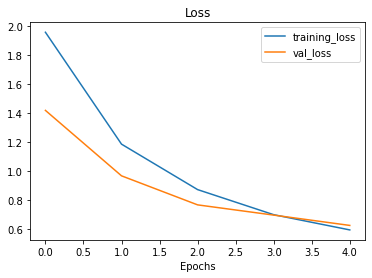

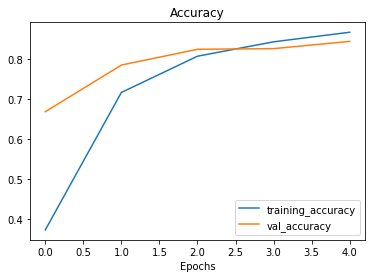

In [ ]:
plot_loss_curves(history_0)

## Getting a feature vector from a trained model
* Let's demonstrate the global average pooling 2d layers

* we have a tensor  after our model goes through 'base model ' of shape(None, 7, 7, 1280)...

* but then when it passes through GlabalAveragePooling2D, it turns into (None, 1280).

* lets use similar shape tensor of (1,4,4,3) and then pass it to GlobalAveragePooling2D

In [ ]:
# define input shape
input_shape = (1,4,4,3)

# create random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random_tensor:\n {input_tensor}\n")

#pass the tensor through GlobalAveragePooling2D layer
global_average_pooled = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2 D global average pooled random tensor:\n{global_average_pooled}\n")

# check the shape of tensor
print(f"shape of input_tensor{input_tensor.shape}")
print(f"shape of gloablaveragepooled{global_average_pooled.shape}")

random_tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2 D global average pooled random tensor:
[[-0.09368646 -0.45840445 -0.28855976]]

shape of input_tensor(1, 4, 4, 3)
shape of gloablaveragepooled(1, 3)


In [ ]:
# lets replicate the GloablAveragepool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

## A feature vector is a learned representation of the input data (a compressed form of the input data based on how the model see's it)

### Running a series of transfer learning experiments
* now we fit 1 % of training data, and see what the result is
* we already train 10 % of data and the results is incredible 

* model_1 = use **feature extraction** transfer learning with 1% of training data with data augmentation

* model_2 = use **feature extraction** transfer learning with 10% of training data with data augmentation

* model_3 = use **Fine-Tuning** transfer learning with 10% of training data with data augmentation

* model_4 = use **Fine-Tuning** transfer learning with 100% of training data with data augmentation

In [ ]:
!wget = https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-07-03 07:57:14--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-07-03 07:57:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   293MB/s    in 0.4s    

2021-07-03 07:57:15 (293 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]

FINISHED --2021-07-03 07:57:15--
Total wall clock time: 0.6s
Downloaded: 1 files, 127M in 0.4s (293 MB/s)


In [ ]:
import zipfile
unzip_data('/content/10_food_classes_1_percent.zip')

In [ ]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/c

In [ ]:
train_dir = '/content/10_food_classes_1_percent/train'
test_dir = '/content/10_food_classes_1_percent/test'



In [ ]:
import tensorflow as tf

In [ ]:
img_size = (224,224)
train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode='categorical',
                                                                   batch_size = 32,
                                                                   image_size = img_size,
                                                                   )
test_data_1 = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   label_mode='categorical',
                                                                   batch_size = 32,
                                                                   image_size = img_size,
                                                                   )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#Adding data augmentation right into model 
To add data augmentation into our models, we can use the layers inside:

#### The benefits of using data augmentation inside the model are:

* preprocessing of images (augmenting them) happens on the gpu much faster rather than the cpu
* image data augmentation only happens during training, so we can still export our whole model and use it elsewhere.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create data augmentation with horizantal flip, rotations, zooms, etc
data_aug = keras.Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomHeight(0.2),
  # preprocessing.Rescale(1./255) # keep for models like resnet50v2, but efficientnet having rescaling built in
  ], name = 'data_augmentation')

##Visualize our data augmentation layer(and see what happen to our data)

In [ ]:
# vie a random image and compare it to augmentated image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1.class_names)
target_dir = '/content/10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
print(random_image_path)

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original_image from class{target_class}")


augmen_imag = data_aug(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmen_imag/255.))
plt.title(f"augmentation image from class {target_class}")

NameError: ignored

 ## Model 1: Feature extraction transfer leraning on 1 % of data augmentation

In [ ]:
#setup input shape and base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer 
inputs = layers.Input(shape=input_shape, name='input_layer')

# add in data augmentation sequential model as layers
x = data_aug(inputs)

#give base model the input (after augmentation) and don't train it
x = base_model(x, training = False)

# pool output features of the base model
x = layers.GlobalAveragePooling2D(name= 'globalAverage_pooling_layers')(x)

# put a dense layers on as the output
outputs = layers.Dense(10, activation='softmax', name = 'output_layer')(x)

#make a mode using a input and output'
model_1 = keras.Model(inputs, outputs)

# compile a model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data_1, 
                        epochs = 5,
                        steps_per_epoch=len(train_data_1),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        #track model training loss
                        callbacks = [create_tensorboard_callback('/content/transfer_learning',
                                                                 '1_percent_data')])


Saving TensorBoard log files to: /content/transfer_learning/1_percent_data/20210703-075739
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 11s 3s/step - loss: 2.3463 - accuracy: 0.1143 - val_loss: 2.2575 - val_accuracy: 0.1661
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.0319 - accuracy: 0.2857 - val_loss: 2.1354 - val_accuracy: 0.2303
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.8913 - accuracy: 0.4286 - val_loss: 2.0283 - val_accuracy: 0.3010
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7209 - accuracy: 0.5143 - val_loss: 1.9255 - val_accuracy: 0.3783
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.5795 - accuracy: 0.6143 - val_loss: 1.8668 - val_accuracy: 0.4161


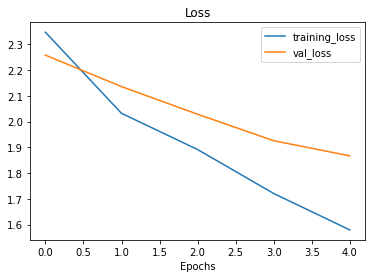

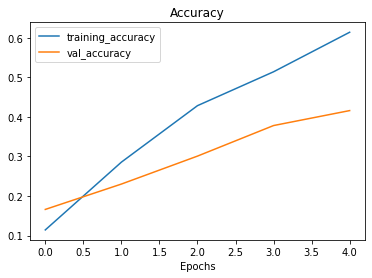

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
globalAverage_pooling_layers (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


## Model 2 : fetaure extraction transfer learning model with 

10% of data augmentation


In [ ]:
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_per

In [ ]:
 #create a base model with tf.keras.application
#setup input shape and base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer 
inputs = layers.Input(shape=input_shape, name='input_layer')

# add in data augmentation sequential model as layers
x = data_aug(inputs )

#give base model the input (after augmentation) and don't train it
x = base_model(x, training = False)

# pool output feature vector of the base model
x = layers.GlobalAveragePooling2D(name= 'globalAverage_pooling_layers')(x)

# put a dense layers on as the output
outputs = layers.Dense(10, activation='softmax', name = 'output_layer')(x)

#make a mode using a input and output'
model_two = keras.Model(inputs, outputs)

# compile a model
model_two.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


16711680/16705208 [==============================] - 0s 0us/step


###  create a model_checkpoint callback 
The modelcheckpoint callback interediately saves our model (the full model or just the weights) during training, this is useful so we can come and start where we left off

In [ ]:
# set checkpoint path
checkpoint_path = '/content/tensorflow_checkpoints_weight/checkpoint.ckpt'

# create a model checkpoint callback that saves model weights only 
checkpoint_callback =  tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, 
                                                          save_weights_only = True,
                                                          save_best_only=False,
                                                          save_freq = 'epoch',
                                                          verbose=1)

In [ ]:
history_2 = model_two.fit(train_data_10, 
                        epochs = 5,
                        steps_per_epoch=len(train_data_10),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        #track model training loss
                        callbacks = [create_tensorboard_callback('/content/transfer_learning_10',
                                                                 '10_percent_data')])

Saving TensorBoard log files to: /content/transfer_learning_10/10_percent_data/20210703-063751
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 52s 735ms/step - loss: 2.0318 - accuracy: 0.3293 - val_loss: 1.5551 - val_accuracy: 0.5872
Epoch 2/5
24/24 [==============================] - 11s 427ms/step - loss: 1.3865 - accuracy: 0.6547 - val_loss: 1.0947 - val_accuracy: 0.7533
Epoch 3/5
24/24 [==============================] - 10s 412ms/step - loss: 1.0656 - accuracy: 0.7347 - val_loss: 0.8978 - val_accuracy: 0.7878
Epoch 4/5
24/24 [==============================] - 9s 363ms/step - loss: 0.9266 - accuracy: 0.7653 - val_loss: 0.7808 - val_accuracy: 0.7961
Epoch 5/5
24/24 [==============================] - 9s 384ms/step - loss: 0.8104 - accuracy: 0.7987 - val_loss: 0.7299 - val_accuracy: 0.8010


In [ ]:
result_10_percent_data_aug = model_two.evaluate(test_data)
result_10_percent_data_aug

79/79 [==============================] - 9s 112ms/step - loss: 0.7058 - accuracy: 0.8120


[0.7057645916938782, 0.8119999766349792]

## fit model 2 passing in the modelcheckpoint callback

In [ ]:
# fit the model saving checkpoints every epoch
initial_epoch = 5
history_10_percent_data_aug =  model_two.fit(train_data_10, 
                        epochs = initial_epoch,
                        # steps_per_epoch=len(train_data_10),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        #track model training loss
                        callbacks = [create_tensorboard_callback('/content/transfer_learning_10',
                                                                 '10_percent_data'),
                                     checkpoint_callback]) 

Saving TensorBoard log files to: /content/transfer_learning_10/10_percent_data/20210703-064036
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 11s 440ms/step - loss: 0.7285 - accuracy: 0.8040 - val_loss: 0.6844 - val_accuracy: 0.7977

Epoch 00001: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 10s 393ms/step - loss: 0.6744 - accuracy: 0.8293 - val_loss: 0.6256 - val_accuracy: 0.8240

Epoch 00002: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 9s 363ms/step - loss: 0.6340 - accuracy: 0.8387 - val_loss: 0.5797 - val_accuracy: 0.8273

Epoch 00003: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 9s 358ms/step - loss: 0.5765 - accuracy: 0.8493 - val_loss: 0.5686 - val_accuracy: 0.8257

Epoch 00004: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 11s 421ms/step - loss: 0.5469 - accuracy: 0.8733 - va

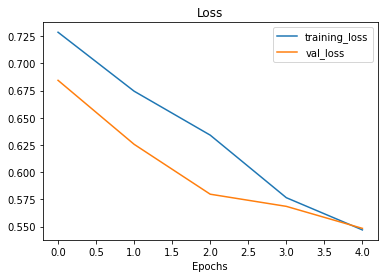

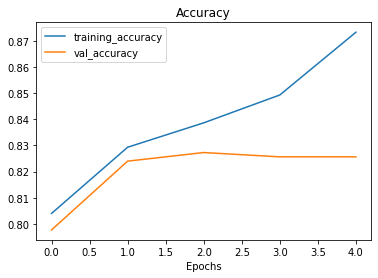

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

## loading in checkpoint weights

> Indented block

> Indented block




Loading in checkpointed weights return a model to a specific model 

In [ ]:
# load in saved model weights and evaluate it
model_two.load_weights(checkpoint_path)

In [ ]:
#evaluate model_2 with loaded weights
loaded_weights_model = model_two.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 0.5624 - accuracy: 0.8332


In [ ]:
### if the result from the previous model_2 match the loaded weights 
# np.isclose() # use to match 2 number such as = 1.2222552 == 1.2223333 = True

## Model 3: Fine-Tunning an Existing model on 10% of data
* fine tunning usually best after training a fetaure extraction model for a few epochs with large amounts of custom data.

In [ ]:
model_two.layers

In [ ]:
for layers in model_two.layers:
  print(layers, layers.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f88c8cba2d0> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f88c92a51d0> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f88c012e6d0> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f88c8cb1410> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f88c0113f50> True


In [ ]:
# what layers are in our base_models and are they trainable
for i , layer in enumerate(model_two.layers[2].layers):
  print(i, layer.name, layer.trainable) 

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
#how many trainable variable are in our base model?
print(len(model_two.layers[2].trainable_variables))

0


In [ ]:
# to begin fine-tunning, lets start by setting the last 10 layers of our base_model.trainable = True

base_model.trainable = True

for layers in base_model.layers[:-10]:
  layers.trainable = False

In [ ]:
# recompile the model (we have to recompile our model every time we make changes)
model_two.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.0001), # when find tunning we tipically want to lower learning-rate by 10x
                metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### when using fine-tunning it's a best practice to lower our learning rate by some amount , how much this  is a hyperparamter can tune. but a good rule ot thumb is at atleast 10x 

In [ ]:
#check which layer trainable 
for layer_number, layer in enumerate(model_two.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

#### Now we've unfroozen  some of the layers closer to the top, how many trainable variable  are there

In [ ]:
print(len(model_two.trainable_variables))

12


In [ ]:
# fine tune for another five epochs
fine_tune_epoch = initial_epoch + 5

#REFIT the model (same as model_2 except with more trainable layers )
history_fine_tune_10 = model_two.fit(train_data_10,
                                   epochs = fine_tune_epoch,
                                   validation_data=test_data,
                                   validation_steps=int(0.25 *len(test_data) ),
                                   initial_epoch=history_10_percent_data_aug.epoch[-1], # start training from last epoch
                                   callbacks = [create_tensorboard_callback('transfer_learning',
                                                                           '10%fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/10%fine_tune_last_10/20210703-064424
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 19s 514ms/step - loss: 0.4960 - accuracy: 0.8667 - val_loss: 0.5176 - val_accuracy: 0.8289
Epoch 6/10
24/24 [==============================] - 10s 393ms/step - loss: 0.4165 - accuracy: 0.8573 - val_loss: 0.4969 - val_accuracy: 0.8322
Epoch 7/10
24/24 [==============================] - 8s 340ms/step - loss: 0.3697 - accuracy: 0.8880 - val_loss: 0.4946 - val_accuracy: 0.8388
Epoch 8/10
24/24 [==============================] - 9s 368ms/step - loss: 0.3048 - accuracy: 0.9147 - val_loss: 0.4676 - val_accuracy: 0.8487
Epoch 9/10
24/24 [==============================] - 9s 352ms/step - loss: 0.3092 - accuracy: 0.9040 - val_loss: 0.4658 - val_accuracy: 0.8536
Epoch 10/10
24/24 [==============================] - 8s 340ms/step - loss: 0.2669 - accuracy: 0.9187 - val_loss: 0.5344 - val_accuracy: 0.8355


In [ ]:
model_two.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.4895 - accuracy: 0.8440


[0.48950308561325073, 0.843999981880188]

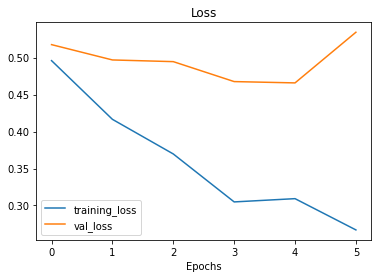

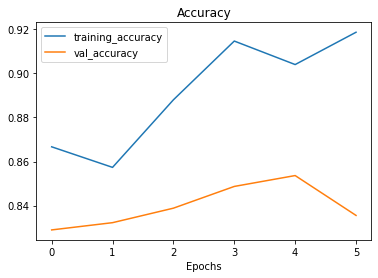

In [ ]:
plot_loss_curves(history_fine_tune_10)

#### plot loss curves function works great with model fits only onces, however, we want something to compare before and after fine-tunning model

In [ ]:
# lets create function to compare training history
import matplotlib.pyplot as plt

def compare_histories(original_history, new_history, initial_epochs=5):
  #get original history
  acc = original_history.history['accuracy']
  loss= original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss= original_history.history['val_loss']

  #combine original history metrix with new_history metrix
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # make plots
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='training_acc')
  plt.plot(total_val_acc, label='validation accuracy')

  plt.plot([initial_epoch-1, initial_epoch-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title("training and validation accuracy")

  # make plots for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label='training_loss')
  plt.plot(total_val_loss, label='validation loss')

  plt.plot([initial_epoch-1, initial_epoch-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title("training and validation loss")

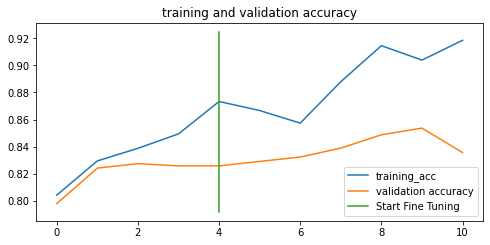

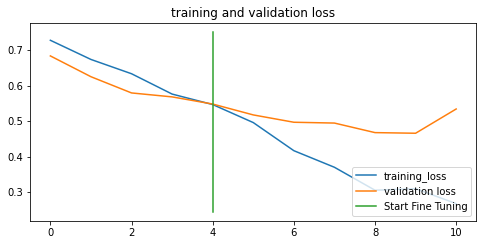

In [ ]:
compare_histories(history_10_percent_data_aug,
                  history_fine_tune_10)

In [ ]:
## Model 4: Fine-Tunning on Existing Model on all of the data
!wget = https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-07-03 06:46:22--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-07-03 06:46:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   270MB/s    in 1.8s    

2021-07-03 06:46:24 (270 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

FINISHED --2021-07-03 06:46:24--
Total wall clock time: 2.0s
Downloaded: 1 files, 495M in 1.8s (270 MB/s)


In [ ]:
unzip_data('/content/10_food_classes_all_data.zip')

In [ ]:
#set up training and test dir
train_dir_all = '/content/10_food_classes_all_data/train'
test_dir_all = '/content/10_food_classes_all_data/test'

In [ ]:
walk_through_dir('/content/10_food_classes_all_data')

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_curr

In [ ]:
#setup input data

img_size = (224,224)
train_full_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all,
                                                                      label_mode='categorical',
                                                                      image_size=img_size)

test_full_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all,
                                                                     label_mode='categorical',
                                                                     image_size=img_size
                                                                     )

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test data set is same as what we been using for previous experiments(all experminets)


In [ ]:
model_two.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.4895 - accuracy: 0.8440


[0.4895029366016388, 0.843999981880188]

### To train a fine-tuning model (model_4) we need to revert model_2 back to its feature extraction weights.

In [ ]:
# load weight from checkpoint, that we can fine-tune from the same stage 
# the 10% data model was fine-tuned from
model_two.load_weights(checkpoint_path)


In [ ]:
#lets evaluate mode_2 back
model_two.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.5624 - accuracy: 0.8332


[0.5623944997787476, 0.8331999778747559]

### creating new model for feature extraction for using all the data (fine-tune model)

In [ ]:

 #create a base model with tf.keras.application
#setup input shape and base model
from tensorflow.keras import layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer 
inputs = layers.Input(shape=input_shape, name='input_layer')

# add in data augmentation sequential model as layers
x = data_aug(inputs )

#give base model the input (after augmentation) and don't train it
x = base_model(x, training = False)

# pool output feature vector of the base model
x = layers.GlobalAveragePooling2D(name= 'globalAverage_pooling_layers')(x)

# put a dense layers on as the output
outputs = layers.Dense(10, activation='softmax', name = 'output_layer')(x)

#make a mode using a input and output'
model_two = keras.Model(inputs, outputs)

# compile a model
model_two.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



In [ ]:
# set checkpoint path
checkpoint_path = '/content/tensorflow_checkpoints_weight/checkpoint.ckpt'

# create a model checkpoint callback that saves model weights only 
checkpoint_callback =  tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, 
                                                          save_weights_only = True,
                                                          save_best_only=False,
                                                          save_freq = 'epoch',
                                                          verbose=1)

In [ ]:
# fit the model saving checkpoints every epoch
initial_epoch = 5
results_10_percent_data_aug =  model_two.fit(train_data_10, 
                        epochs = initial_epoch,
                        # steps_per_epoch=len(train_data_10),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        #track model training loss
                        callbacks = [create_tensorboard_callback('/content/transfer_learning_10',
                                                                 '10_percent_data'),
                                     checkpoint_callback])

Saving TensorBoard log files to: /content/transfer_learning_10/10_percent_data/20210703-065423
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 12s 299ms/step - loss: 2.0695 - accuracy: 0.3227 - val_loss: 1.5639 - val_accuracy: 0.5789

Epoch 00001: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 5s 200ms/step - loss: 1.3869 - accuracy: 0.6627 - val_loss: 1.0936 - val_accuracy: 0.7664

Epoch 00002: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 5s 199ms/step - loss: 1.0687 - accuracy: 0.7480 - val_loss: 0.9088 - val_accuracy: 0.7928

Epoch 00003: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 5s 210ms/step - loss: 0.9021 - accuracy: 0.7853 - val_loss: 0.7674 - val_accuracy: 0.8158

Epoch 00004: saving model to /content/tensorflow_checkpoints_weight/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 5s 210ms/step - loss: 0.8067 - accuracy: 0.8027 - val_

In [ ]:
model_two.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.7054 - accuracy: 0.8096


[0.7054261565208435, 0.8095999956130981]

In [ ]:
model_two.load_weights(checkpoint_path)

In [ ]:
model_two.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.7054 - accuracy: 0.8096


[0.705426037311554, 0.8095999956130981]

Alright, the previous steps might seem quite confusion but all we've done is:
1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data with data augmentation (model_2) and saved its weights using **ModelCheckpoint** callback
2. Fine-tuned the same model on the same 10% of the data for furthe 5 epochs with **Top 10 layers of the base model unfrozen** (model_3)
3. save the results and training logs each time
4. Reloaded the model from step 1 to do the same steps as steps 2 except this time we're going to use **all the data** (model 4)

In [ ]:
for layer_number, layer in enumerate(model_two.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 False
3 globalAverage_pooling_layers True
4 output_layer True


In [ ]:
 # to begin fine-tunning, lets start by setting the last 10 layers of our base_model.trainable = True

base_model.trainable = True

for layers in base_model.layers[:-10]:
  layers.trainable = False

In [ ]:
for layer_number, layer in enumerate(model_two.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 globalAverage_pooling_layers True
4 output_layer True


In [ ]:
for layer_number, layers in enumerate(model_two.layers[2].layers):
  print(layer_number, layers.name, layers.trainable) 

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
#compile 
model_two.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  metrics = ['accuracy'])



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#continue to train and fine tune our model on 100% data
fine_tune_epoch = initial_epoch + 5
history_100 = model_two.fit(train_full_data,
                            epochs=fine_tune_epoch,
                            validation_data=test_full_data,
                            validation_steps=int(0.25 * len(test_data)),
                            initial_epoch=history_10_percent_data_aug.epoch[-1],
                            callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                   experiment_name = 'full_class_fine_tune_last_10')]
                            )

Saving TensorBoard log files to: transfer_learning/full_class_fine_tune_last_10/20210703-072617
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 62s 244ms/step - loss: 0.7319 - accuracy: 0.7623 - val_loss: 0.4329 - val_accuracy: 0.8684
Epoch 6/10
235/235 [==============================] - 54s 229ms/step - loss: 0.5827 - accuracy: 0.8173 - val_loss: 0.3466 - val_accuracy: 0.8914
Epoch 7/10
235/235 [==============================] - 49s 205ms/step - loss: 0.5185 - accuracy: 0.8319 - val_loss: 0.3098 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 49s 207ms/step - loss: 0.4776 - accuracy: 0.8477 - val_loss: 0.3239 - val_accuracy: 0.9046
Epoch 9/10
235/235 [==============================] - 47s 198ms/step - loss: 0.4341 - accuracy: 0.8597 - val_loss: 0.2900 - val_accuracy: 0.9095
Epoch 10/10
235/235 [==============================] - 42s 179ms/step - loss: 0.4093 - accuracy: 0.8701 - val_loss: 0.3030 - val_accuracy: 0.9046


In [ ]:
result_100_evaluation = model_two.evaluate(test_data)
result_100_evaluation

79/79 [==============================] - 9s 105ms/step - loss: 0.2986 - accuracy: 0.9008


[0.2986319959163666, 0.9007999897003174]

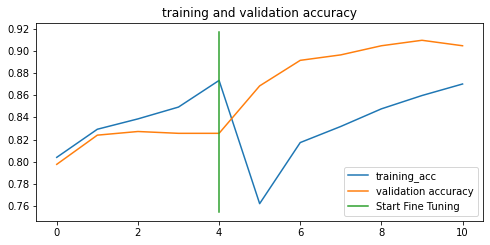

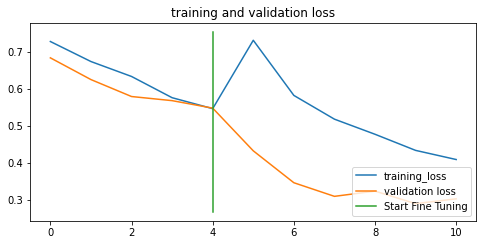

In [ ]:
compare_histories(history_10_percent_data_aug,
                  history_100)

# /content/transfer_learning

### viewing our experiment data on Tensorboard

* Anything we upload to Tensorboard.dev is going to be public. so if you have private data, do not upload.




In [ ]:
# view tensorboard logs of transfer learning modelling experiments (should  -4 models) 
# upload tensorboard dev records
! tensorboard dev upload --logdir ./transfer_learning \
  --name 'Transfer_learning Experiments with 10_food_101_classes' \
  --description 'A series of different transfer learning models with varying amount of data and fine-tuning.' \
  --one_shot # exits the uploader once its finished uploading 

2021-07-03 07:59:03.153613: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/oUgpdxHKQHyl42qtxOJAiw/

[2021-07-03T07:59:04] Started scanning logdir.
[2021-07-03T07:59:08] Total uploaded: 132 scalars, 0 tensors, 4 binary objects (3.2 MB)
[2021-07-03T07:59:08] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/oUgpdxHKQHyl42qtxOJAiw/


In [ ]:
# all of your tensorboard experiment 
!tensorboard dev list

2021-07-03 08:11:15.417586: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
https://tensorboard.dev/experiment/oUgpdxHKQHyl42qtxOJAiw/
	Name                 Transfer_learning Experiments with 10_food_101_classes
	Description          A series of different transfer learning models with varying amount of data and fine-tuning.
	Id                   oUgpdxHKQHyl42qtxOJAiw
	Created              2021-07-03 07:59:04 (12 minutes ago)
	Updated              2021-07-03 07:59:08 (12 minutes ago)
	Runs                 8
	Tags                 5
	Scalars              132
	Tensor bytes         0
	Binary object bytes  3367206
https://tensorboard.dev/experiment/O7ASKPK7S9eib5yudKflvA/
	Name                 Transfer_learning Experiments with 10_fo

In [ ]:
# to delete tensorboard experiment
!tensorboard dev delete --experiment_id oUgpdxHKQHyl42qtxOJAiw

2021-07-03 08:12:37.404482: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Deleted experiment oUgpdxHKQHyl42qtxOJAiw.
